In [1]:
import numpy as np
import sympy
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [2]:
df_Ag = pd.read_csv('Ag.csv')
df_Ag1 = pd.read_csv('Ag1.csv')
df_Ag2 = pd.read_csv('Ag2.csv')

In [3]:
def model_SAD(I,t,k,A,alpha,beta):
    Na,Ns,Nd = I
    dNa = beta*Ns+k*(1-Na/(A-Nd-Ns))*Na
    dNs = -alpha*Ns-beta*Ns
    dNd = alpha*Ns
    return np.array([dNa,dNs,dNd])
def fit_model_SAD(t,k,A,alpha,beta):
    return odeint(model_SAD,(Na0,Ns0,Nd0),t,args=(k,A,alpha,beta))
def fit_od(t,k,A,alpha,beta):
    return np.sum(fit_model_SAD(t,k,A,alpha,beta),axis=1)
def fit_CFU(t,k,A,alpha,beta):
    return np.sum(fit_model_SAD(t,k,A,alpha,beta)[:,0:2],axis=1)
def Gompertz(t, N0, A, lamta, Um):
    return N0+(A-N0)*np.exp(-np.exp(Um*np.exp(1)*(lamta-t)/(A-N0) + 1))

In [4]:
def R_squared(Y,Y_fitted):
    mean = np.mean(Y)
    ss_tot = np.sum((Y - mean) ** 2)
    ss_res = np.sum((Y - Y_fitted) ** 2)
    r_squared = 1 - (ss_res / ss_tot) 
    return np.round(r_squared,3)

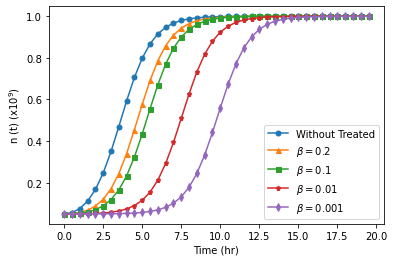

In [5]:
## Predicted curves of n as a function of time t, with decreasing weak-up rate beta
Na0,Ns0,Nd0 = (0,0.05,0)
alpha = 0
beta1 = 1
beta2 = 0.2
beta3 = 1e-1
beta4 = 1e-2
beta5 = 1e-3
beta6 = 1e-4

k = 1
A = 1.0
t = np.arange(0,20,0.5)

od1 = fit_od(t,k,A,alpha,beta1)
od2 = fit_od(t,k,A,alpha,beta2)
od3 = fit_od(t,k,A,alpha,beta3)
od4 = fit_od(t,k,A,alpha,beta4)
od5 = fit_od(t,k,A,alpha,beta5)
od6 = fit_od(t,k,A,alpha,beta6)

plt.plot(t,od1,label=r'Without Treated',marker='o',markersize=5)
plt.plot(t,od2,label= r'$\beta=0.2$',marker='^',markersize=5)
plt.plot(t,od3,label= r'$\beta=0.1$',marker='s',markersize=5) 
plt.plot(t,od4,label= r'$\beta=0.01$',marker='p',markersize=5)
plt.plot(t,od5,label= r'$\beta=0.001$',marker='d',markersize=5)

plt.xlabel("Time (hr)")
plt.ylabel("n (t) (x10$^{9}$)")
plt.legend(loc=4)
plt.show()

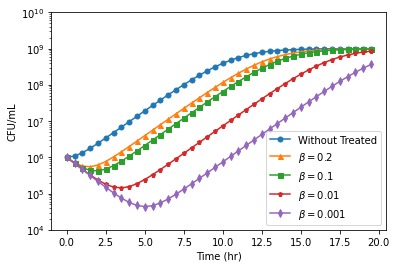

In [6]:
## Predicted CFU curves of n as a function of time t, with decreasing weak-up rate beta
Na0,Ns0,Nd0 = (0,1e+6,0)
alpha1 = 0
beta1 = 1

alpha2 = 0.77
beta2 = 0.2
beta3 = 0.1
beta4 = 0.01
beta5 = 0.001
k = 0.7
A = 1e+9
t = np.arange(0,20,0.5)

y = fit_CFU(t,k,A,alpha1,beta1)
plt.axes(yscale = "log")
plt.ylim((1e+4,1e+10))

plt.plot(t,fit_CFU(t,k,A,alpha1,beta1),label='Without Treated',marker='o',markersize=5)
plt.plot(t,fit_CFU(t,k,A,alpha2,beta2),label=r'$\beta=0.2$',marker='^',markersize=5)
plt.plot(t,fit_CFU(t,k,A,alpha2,beta3),label= r'$\beta=0.1$',marker='s',markersize=5)
plt.plot(t,fit_CFU(t,k,A,alpha2,beta4),label= r'$\beta=0.01$',marker='p',markersize=5)
plt.plot(t,fit_CFU(t,k,A,alpha2,beta5),label= r'$\beta=0.001$',marker='d',markersize=5)

plt.xlabel("Time (hr)")
plt.ylabel("CFU/mL")
plt.legend()
plt.show()

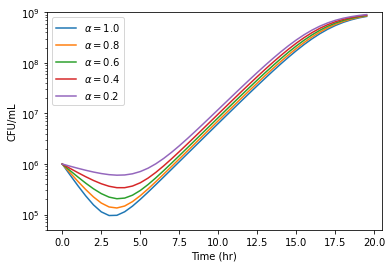

In [7]:
## Predicted CFU curves of n as a function of time t, with decreasing killing rate beta
Na0,Ns0,Nd0 = (0,1e+6,0)
beta = 0.01
alpha1 = 1
alpha2 = 0.8
alpha3 = 0.6
alpha4 = 0.4
alpha5 = 0.2

k = 0.7
A = 1e+9
t = np.arange(0,20,0.5)

y = fit_CFU(t,k,A,alpha1,beta)
plt.axes(yscale = "log")
plt.ylim((50000,1e+9))

plt.plot(t,fit_CFU(t,k,A,alpha1,beta),label= r'$\alpha=1.0$')
plt.plot(t,fit_CFU(t,k,A,alpha2,beta),label= r'$\alpha=0.8$')
plt.plot(t,fit_CFU(t,k,A,alpha3,beta),label= r'$\alpha=0.6$')
plt.plot(t,fit_CFU(t,k,A,alpha4,beta),label= r'$\alpha=0.4$')
plt.plot(t,fit_CFU(t,k,A,alpha5,beta),label= r'$\alpha=0.2$')

plt.xlabel("Time (hr)")
plt.ylabel("CFU/mL")
plt.legend()
plt.show()

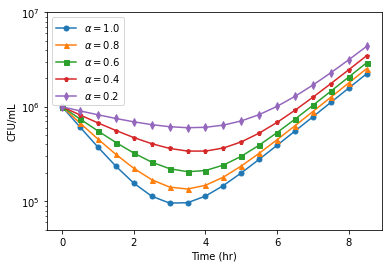

In [8]:
## Predicted CFU curves of n as a function of time t, with decreasing killing rate beta
Na0,Ns0,Nd0 = (0,1e+6,0)
beta = 0.01
alpha1 = 1
alpha2 = 0.8
alpha3 = 0.6
alpha4 = 0.4
alpha5 = 0.2

k = 0.7
A = 1e+9
t = np.arange(0,9,0.5)

y = fit_CFU(t,k,A,alpha1,beta)
plt.axes(yscale = "log")
plt.ylim((50000,1e+7))

plt.plot(t,fit_CFU(t,k,A,alpha1,beta),label= r'$\alpha=1.0$',marker='o',markersize=5)
plt.plot(t,fit_CFU(t,k,A,alpha2,beta),label= r'$\alpha=0.8$',marker='^',markersize=5)
plt.plot(t,fit_CFU(t,k,A,alpha3,beta),label= r'$\alpha=0.6$',marker='s',markersize=5)
plt.plot(t,fit_CFU(t,k,A,alpha4,beta),label= r'$\alpha=0.4$',marker='p',markersize=5)
plt.plot(t,fit_CFU(t,k,A,alpha5,beta),label= r'$\alpha=0.2$',marker='d',markersize=5)

plt.xlabel("Time (hr)")
plt.ylabel("CFU/mL")
plt.legend()
plt.show()